# Análisis de Comentarios instagram Lemus

In [1]:
# Importamos las librerías

import re
import nltk
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from nltk.tokenize import RegexpTokenizer

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

###Diccionarios en español para el análisis de polaridad
nltk.download('punkt')
# Tokenización
# Descargar el conjunto de stopwords en español si no lo tienes
nltk.download('stopwords')
# Análisis de polaridad
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /home/milton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/milton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df_coments = pd.read_csv("instagram_coments_lemus.csv", usecols=["_aacl", "x1i10hfl 3"])
df_coments["texto"] = df_coments["_aacl"] + ' ' + df_coments["x1i10hfl 3"]
df_coments = df_coments.drop("_aacl", axis=1)
df_coments = df_coments.drop("x1i10hfl 3", axis=1)
df_coments = df_coments.dropna()
df_coments

,texto
2,"Buen inicio de semana! Hoy por la mañana, en r..."
6,Acompáñanos a la inauguración de la segunda ed...
10,¿Quién mejor para hablar de ciudades que los m...
26,"conocida como desde vista aérea, de fondo y ..."
32,"A través de la , queremos devolver a instituci..."
...,...
610,😱 ¿Les gusta el pulque? Pues tienen que probar...
616,Con la piel chinita 🇲🇽🔔🙌🏻 Gracias por esta emo...
619,"¡Viva México! 🇲🇽 Hoy, en este día lleno de ale..."
622,Así se siente México 🇲🇽 #diadelaindependencia


In [3]:
def limpiar_texto(texto):
    # Eliminar caracteres especiales y números
    texto_limpio = re.sub(r'[^\w\sáéíóúüÁÉÍÓÚÜñ]', '', texto, flags=re.UNICODE)
    # Eliminar espacios en blanco adicionales y convertir a minúsculas
    texto_limpio = ' '.join(texto_limpio.split()).lower()
    return texto_limpio

df_coments["texto"] = df_coments["texto"].apply(limpiar_texto)
df_coments_clean = df_coments.copy()
df_coments

,texto
2,buen inicio de semana hoy por la mañana en rep...
6,acompáñanos a la inauguración de la segunda ed...
10,quién mejor para hablar de ciudades que los mi...
26,conocida como desde vista aérea de fondo y la ...
32,a través de la queremos devolver a institucion...
...,...
610,les gusta el pulque pues tienen que probar est...
616,con la piel chinita gracias por esta emotiva y...
619,viva méxico hoy en este día lleno de alegría y...
622,así se siente méxico diadelaindependencia


In [4]:
df_coments['texto'] = df_coments['texto'].str.lower()
tokenizer = RegexpTokenizer(r'\w+')
df_coments['tokens'] = df_coments['texto'].apply(tokenizer.tokenize)
df_coments.to_csv("coments_insta.csv")
df_coments

,texto,tokens
2,buen inicio de semana hoy por la mañana en rep...,"[buen, inicio, de, semana, hoy, por, la, mañan..."
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñanos, a, la, inauguración, de, la, seg..."
10,quién mejor para hablar de ciudades que los mi...,"[quién, mejor, para, hablar, de, ciudades, que..."
26,conocida como desde vista aérea de fondo y la ...,"[conocida, como, desde, vista, aérea, de, fond..."
32,a través de la queremos devolver a institucion...,"[a, través, de, la, queremos, devolver, a, ins..."
...,...,...
610,les gusta el pulque pues tienen que probar est...,"[les, gusta, el, pulque, pues, tienen, que, pr..."
616,con la piel chinita gracias por esta emotiva y...,"[con, la, piel, chinita, gracias, por, esta, e..."
619,viva méxico hoy en este día lleno de alegría y...,"[viva, méxico, hoy, en, este, día, lleno, de, ..."
622,así se siente méxico diadelaindependencia,"[así, se, siente, méxico, diadelaindependencia]"


In [5]:
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("q", "d", "van", "si", "pa", "así", "ser", "solo", "tan", "va", "as",
                "le", "con","ella", "qué", "por", "qu", "ers", "das", "ve", "jajaja", "jeje", "La", "nimo", "ms", "da"))

In [6]:
# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = df_coments[~(df_coments["tokens"].isin(stop_words))]
tweets_tidy

,texto,tokens
2,buen inicio de semana hoy por la mañana en rep...,"[buen, inicio, de, semana, hoy, por, la, mañan..."
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñanos, a, la, inauguración, de, la, seg..."
10,quién mejor para hablar de ciudades que los mi...,"[quién, mejor, para, hablar, de, ciudades, que..."
26,conocida como desde vista aérea de fondo y la ...,"[conocida, como, desde, vista, aérea, de, fond..."
32,a través de la queremos devolver a institucion...,"[a, través, de, la, queremos, devolver, a, ins..."
...,...,...
610,les gusta el pulque pues tienen que probar est...,"[les, gusta, el, pulque, pues, tienen, que, pr..."
616,con la piel chinita gracias por esta emotiva y...,"[con, la, piel, chinita, gracias, por, esta, e..."
619,viva méxico hoy en este día lleno de alegría y...,"[viva, méxico, hoy, en, este, día, lleno, de, ..."
622,así se siente méxico diadelaindependencia,"[así, se, siente, méxico, diadelaindependencia]"


In [7]:
##########NUBE DE PALABRAS
def preprocess_text(text):
    words = text # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalpha()]  # Eliminar caracteres no alfabéticos
    words = [word for word in words if word not in stop_words]  # Eliminar palabras vacías
    return words


preprocessed_text = tweets_tidy["tokens"].apply(preprocess_text)

preprocessed_text

2      [buen, inicio, semana, hoy, mañana, representa...
6      [acompáñanos, inauguración, segunda, edición, ...
10     [quién, mejor, hablar, ciudades, mismos, alcal...
26     [conocida, vista, aérea, fondo, construcción, ...
32     [través, queremos, devolver, institucionalidad...
                             ...                        
610    [gusta, pulque, pues, probar, bebida, ancestra...
616    [piel, chinita, gracias, emotiva, especial, no...
619    [viva, méxico, hoy, día, lleno, alegría, emoci...
622                       [méxico, diadelaindependencia]
625    [viva, zapopan, viva, jalisco, viva, méxico, c...
Name: tokens, Length: 146, dtype: object

In [8]:
# Unimos todas las listas de palabras en una sola lista
all_words = [word for sublist in preprocessed_text.values for word in sublist]

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts = pd.Series(all_words).value_counts()

# Tomamos las palabras más comunes (puedes ajustar este valor según tus necesidades)
top_words = word_counts.head(10)
top_words.to_csv("top_words_coments.csv")
type(top_words)

pandas.core.series.Series

In [9]:
word_counts

guadalajara    59
día            25
jalisco        20
personas       20
hoy            19
               ..
formaron        1
tal             1
dedicación      1
maye            1
mexicanas       1
Name: count, Length: 2189, dtype: int64

In [10]:
# Unir las palabras en un solo texto (separadas por espacios)
texto = " ".join(all_words)
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()

ValueError: Only supported for TrueType fonts

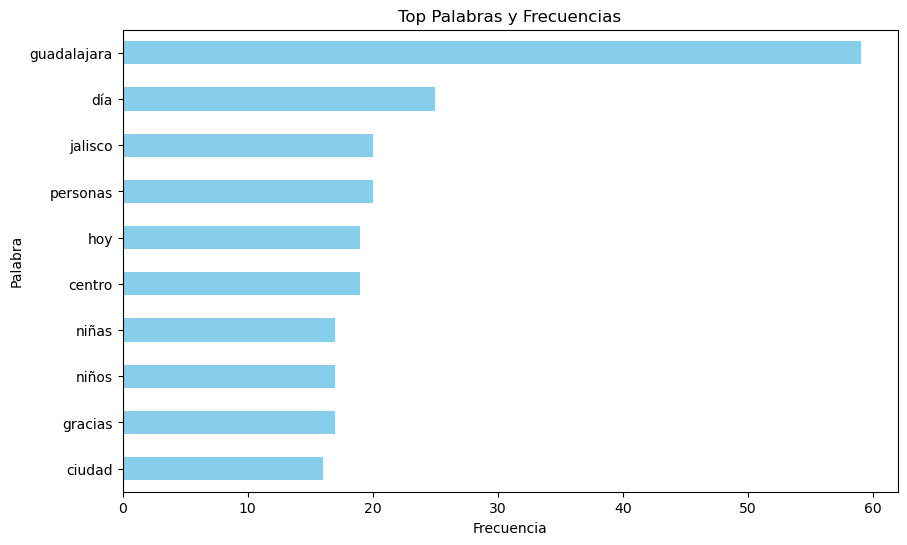

In [11]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top Palabras y Frecuencias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra con la frecuencia más alta en la parte superior
plt.show()

In [12]:
import spacy

nlp = spacy.load("es_core_news_sm")

# Función para preprocesar el texto
def preprocess_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar el preprocesamiento a cada fila del DataFrame
df_coments_clean['texto_preprocesado'] = df_coments_clean['texto'].apply(preprocess_text)
df_coments_clean

,texto,texto_preprocesado
2,buen inicio de semana hoy por la mañana en rep...,"[inicio, semana, mañana, representación, alcal..."
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñano, inauguración, edición, sorprender..."
10,quién mejor para hablar de ciudades que los mi...,"[hablar, ciudad, alcalde, año, recibir, ada, c..."
26,conocida como desde vista aérea de fondo y la ...,"[conocido, vista, aéreo, fondo, construcción, ..."
32,a través de la queremos devolver a institucion...,"[devolver, institucionalidad, año, coordinació..."
...,...,...
610,les gusta el pulque pues tienen que probar est...,"[gustar, pulque, probar, bebida, ancestral, pu..."
616,con la piel chinita gracias por esta emotiva y...,"[piel, chinitar, gracias, emotiva, especial, n..."
619,viva méxico hoy en este día lleno de alegría y...,"[vivo, méxico, lleno, alegría, emoción, celebr..."
622,así se siente méxico diadelaindependencia,"[sentir, méxico, diadelaindependencia]"


In [13]:
import networkx as nx
from gensim import corpora
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Generación de bigramas con spaCy
nlp = spacy.load("es_core_news_sm")

def generar_bigramas_spacy(texto):
    doc = nlp(texto)
    bigramas = [(doc[i].text, doc[i + 1].text) for i in range(len(doc) - 1)]
    return bigramas

df_coments_clean['bigramas_spacy'] = df_coments_clean['texto'].apply(generar_bigramas_spacy)

# Generación de bigramas con NLTK
def generar_bigramas_nltk(texto):
    tokens = word_tokenize(texto)
    bigramas = list(ngrams(tokens, 2))
    return bigramas

df_coments_clean['bigramas_nltk'] = df_coments_clean['texto'].apply(generar_bigramas_nltk)

# Visualización del DataFrame resultante
df_coments_clean


,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk
2,buen inicio de semana hoy por la mañana en rep...,"[inicio, semana, mañana, representación, alcal...","[(buen, inicio), (inicio, de), (de, semana), (...","[(buen, inicio), (inicio, de), (de, semana), (..."
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñano, inauguración, edición, sorprender...","[(acompáñanos, a), (a, la), (la, inauguración)...","[(acompáñanos, a), (a, la), (la, inauguración)..."
10,quién mejor para hablar de ciudades que los mi...,"[hablar, ciudad, alcalde, año, recibir, ada, c...","[(quién, mejor), (mejor, para), (para, hablar)...","[(quién, mejor), (mejor, para), (para, hablar)..."
26,conocida como desde vista aérea de fondo y la ...,"[conocido, vista, aéreo, fondo, construcción, ...","[(conocida, como), (como, desde), (desde, vist...","[(conocida, como), (como, desde), (desde, vist..."
32,a través de la queremos devolver a institucion...,"[devolver, institucionalidad, año, coordinació...","[(a, través), (través, de), (de, la), (la, que...","[(a, través), (través, de), (de, la), (la, que..."
...,...,...,...,...
610,les gusta el pulque pues tienen que probar est...,"[gustar, pulque, probar, bebida, ancestral, pu...","[(les, gusta), (gusta, el), (el, pulque), (pul...","[(les, gusta), (gusta, el), (el, pulque), (pul..."
616,con la piel chinita gracias por esta emotiva y...,"[piel, chinitar, gracias, emotiva, especial, n...","[(con, la), (la, piel), (piel, chinita), (chin...","[(con, la), (la, piel), (piel, chinita), (chin..."
619,viva méxico hoy en este día lleno de alegría y...,"[vivo, méxico, lleno, alegría, emoción, celebr...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...","[(viva, méxico), (méxico, hoy), (hoy, en), (en..."
622,así se siente méxico diadelaindependencia,"[sentir, méxico, diadelaindependencia]","[(así, se), (se, siente), (siente, méxico), (m...","[(así, se), (se, siente), (siente, méxico), (m..."


In [15]:
# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para lematizar el texto
def lematizar_texto(texto):
    doc = nlp(texto)
    lemas = [token.lemma_ for token in doc]
    return " ".join(lemas)

# Aplicar la función de lematización a cada fila del DataFrame
df_coments_clean['texto_lematizado'] = df_coments_clean['texto'].apply(lematizar_texto)

# Visualización del DataFrame resultante
df_coments_clean

,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,texto_lematizado
2,buen inicio de semana hoy por la mañana en rep...,"[inicio, semana, mañana, representación, alcal...","[(buen, inicio), (inicio, de), (de, semana), (...","[(buen, inicio), (inicio, de), (de, semana), (...",buen inicio de semana hoy por el mañana en rep...
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñano, inauguración, edición, sorprender...","[(acompáñanos, a), (a, la), (la, inauguración)...","[(acompáñanos, a), (a, la), (la, inauguración)...",acompáñano a el inauguración de el segundo edi...
10,quién mejor para hablar de ciudades que los mi...,"[hablar, ciudad, alcalde, año, recibir, ada, c...","[(quién, mejor), (mejor, para), (para, hablar)...","[(quién, mejor), (mejor, para), (para, hablar)...",quién mejor para hablar de ciudad que el mismo...
26,conocida como desde vista aérea de fondo y la ...,"[conocido, vista, aéreo, fondo, construcción, ...","[(conocida, como), (como, desde), (desde, vist...","[(conocida, como), (como, desde), (desde, vist...",conocido como desde vista aéreo de fondo y el ...
32,a través de la queremos devolver a institucion...,"[devolver, institucionalidad, año, coordinació...","[(a, través), (través, de), (de, la), (la, que...","[(a, través), (través, de), (de, la), (la, que...",a través de él querer devolver a institucional...
...,...,...,...,...,...
610,les gusta el pulque pues tienen que probar est...,"[gustar, pulque, probar, bebida, ancestral, pu...","[(les, gusta), (gusta, el), (el, pulque), (pul...","[(les, gusta), (gusta, el), (el, pulque), (pul...",él gustar el pulque pues tener que probar este...
616,con la piel chinita gracias por esta emotiva y...,"[piel, chinitar, gracias, emotiva, especial, n...","[(con, la), (la, piel), (piel, chinita), (chin...","[(con, la), (la, piel), (piel, chinita), (chin...",con el piel chinitar gracias por este emotiva ...
619,viva méxico hoy en este día lleno de alegría y...,"[vivo, méxico, lleno, alegría, emoción, celebr...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...",vivo méxico hoy en este día lleno de alegría y...
622,así se siente méxico diadelaindependencia,"[sentir, méxico, diadelaindependencia]","[(así, se), (se, siente), (siente, méxico), (m...","[(así, se), (se, siente), (siente, méxico), (m...",así él sentir méxico diadelaindependencia


In [16]:
# Aplicar el preprocesamiento a cada fila del DataFrame
df_coments_clean['texto_preprocesado'] = df_coments_clean['texto_lematizado'].apply(preprocess_text)

# Crear un diccionario a partir de los documentos preprocesados
dictionary = corpora.Dictionary(df_coments_clean['texto_preprocesado'])

# Crear una representación BoW de los documentos
corpus = [dictionary.doc2bow(texto) for texto in df_coments_clean['texto_preprocesado']]

num_topics = 5  # Ajusta el número de tópicos según tus necesidades
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=10)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.014*"guadalajara" + 0.010*"jalisco" + 0.007*"buenasacción" + 0.006*"seguir" + 0.006*"espacio" + 0.005*"proyecto" + 0.005*"familia" + 0.005*"tapatío" + 0.005*"servicio" + 0.005*"atención"')
(1, '0.013*"guadalajara" + 0.009*"persona" + 0.009*"seguir" + 0.007*"calle" + 0.007*"vivir" + 0.006*"niño" + 0.006*"niña" + 0.005*"centro" + 0.005*"mil" + 0.005*"tapatir"')
(2, '0.023*"mercado" + 0.009*"espacio" + 0.009*"guadalajara" + 0.007*"administración" + 0.007*"centro" + 0.006*"municipal" + 0.006*"rehabilitación" + 0.005*"ciudad" + 0.005*"programa" + 0.005*"tapatío"')
(3, '0.006*"centro" + 0.006*"atención" + 0.006*"seguir" + 0.006*"guadalajara" + 0.005*"talento" + 0.005*"lugar" + 0.005*"persona" + 0.004*"esperar" + 0.004*"programa" + 0.004*"niño"')
(4, '0.015*"guadalajara" + 0.006*"ciudad" + 0.006*"vivo" + 0.006*"municipal" + 0.006*"presidente" + 0.005*"desarrollo" + 0.005*"lemus" + 0.004*"trabajar" + 0.004*"querer" + 0.004*"jalisco"')


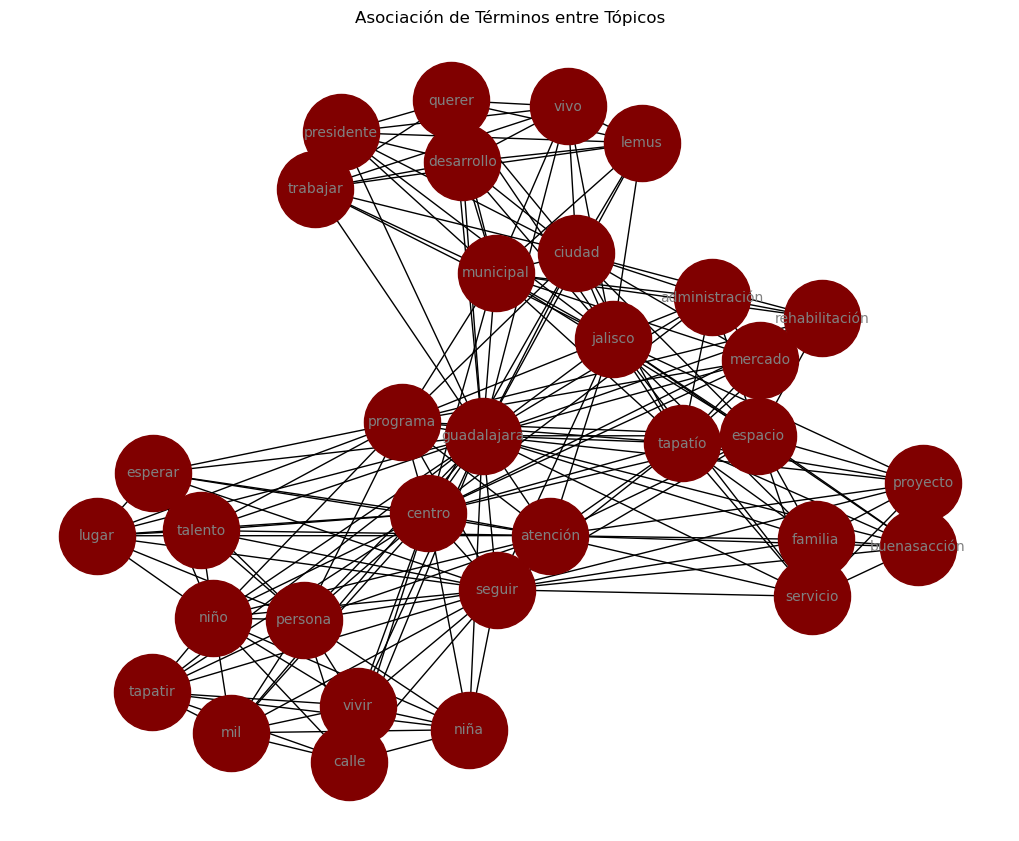

In [17]:
# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='maroon', font_color='gray')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
# Guardar la figura como una imagen
plt.savefig('topicos.png', bbox_inches='tight', dpi=300)
plt.show()

In [18]:
import networkx as nx
import plotly.graph_objects as go

# Crear un grafo de NetworkX
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Obtener las posiciones de los nodos en el gráfico
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Extraer las posiciones X e Y de los nodos
pos_x = {node: pos[node][0] for node in G.nodes}
pos_y = {node: pos[node][1] for node in G.nodes}

# Crear un objeto de grafo de Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos_x[edge[0]], pos_y[edge[0]]
    x1, y1 = pos_x[edge[1]], pos_y[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = list(pos_x.values())
node_y = list(pos_y.values())

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# de conexiones: ' + str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

# Crear la figura de Plotly
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=0, l=0, r=0, t=0),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

# Mostrar la figura
fig.update_layout(title='Asociación de Términos entre Tópicos', title_x=0.5)
fig.show()

In [19]:
# Crear un conjunto de términos únicos
unique_terms = set()
for topic_id, topic_words in topics:
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    unique_terms.update(terms)

# Crear listas para nodos y enlaces
nodes = list(unique_terms)
source_indices = []
target_indices = []
values = []

# Procesar los tópicos y sus palabras clave para identificar las conexiones
for topic_id, topic_words in topics:
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    for term in terms:
        source_indices.append(nodes.index(term))
        target_indices.append(len(nodes) + topic_id)  # Cada tema se representa como un nodo adicional
        values.append(1)

# Crear un diagrama de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes  # Etiquetas de los términos
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

# Mostrar el diagrama de Sankey
fig.update_layout(title_text="Diagrama de Sankey de Tópicos y Términos")
fig.show()

In [20]:
# Mostrar el DataFrame resultante
df_coments_clean

,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,texto_lematizado
2,buen inicio de semana hoy por la mañana en rep...,"[inicio, semana, mañana, representación, alcal...","[(buen, inicio), (inicio, de), (de, semana), (...","[(buen, inicio), (inicio, de), (de, semana), (...",buen inicio de semana hoy por el mañana en rep...
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñano, inauguración, edición, sorprender...","[(acompáñanos, a), (a, la), (la, inauguración)...","[(acompáñanos, a), (a, la), (la, inauguración)...",acompáñano a el inauguración de el segundo edi...
10,quién mejor para hablar de ciudades que los mi...,"[hablar, ciudad, alcalde, año, recibir, ada, c...","[(quién, mejor), (mejor, para), (para, hablar)...","[(quién, mejor), (mejor, para), (para, hablar)...",quién mejor para hablar de ciudad que el mismo...
26,conocida como desde vista aérea de fondo y la ...,"[conocido, vista, aéreo, fondo, construcción, ...","[(conocida, como), (como, desde), (desde, vist...","[(conocida, como), (como, desde), (desde, vist...",conocido como desde vista aéreo de fondo y el ...
32,a través de la queremos devolver a institucion...,"[querer, devolver, institucionalidad, año, coo...","[(a, través), (través, de), (de, la), (la, que...","[(a, través), (través, de), (de, la), (la, que...",a través de él querer devolver a institucional...
...,...,...,...,...,...
610,les gusta el pulque pues tienen que probar est...,"[gustar, pulque, probar, bebida, ancestral, pu...","[(les, gusta), (gusta, el), (el, pulque), (pul...","[(les, gusta), (gusta, el), (el, pulque), (pul...",él gustar el pulque pues tener que probar este...
616,con la piel chinita gracias por esta emotiva y...,"[piel, chinitar, gracia, emotiva, especial, no...","[(con, la), (la, piel), (piel, chinita), (chin...","[(con, la), (la, piel), (piel, chinita), (chin...",con el piel chinitar gracias por este emotiva ...
619,viva méxico hoy en este día lleno de alegría y...,"[vivo, méxico, lleno, alegría, emoción, celebr...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...",vivo méxico hoy en este día lleno de alegría y...
622,así se siente méxico diadelaindependencia,"[sentir, méxico, diadelaindependencia]","[(así, se), (se, siente), (siente, méxico), (m...","[(así, se), (se, siente), (siente, méxico), (m...",así él sentir méxico diadelaindependencia


In [21]:
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def obtener_sentiment(texto):
    analyzer  = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(texto)["compound"]

df_coments_clean["polaridad"] = df_coments_clean["texto"].apply(obtener_sentiment)
df_coments_clean

[nltk_data] Downloading package punkt to /home/milton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/milton/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,texto,texto_preprocesado,bigramas_spacy,bigramas_nltk,texto_lematizado,polaridad
2,buen inicio de semana hoy por la mañana en rep...,"[inicio, semana, mañana, representación, alcal...","[(buen, inicio), (inicio, de), (de, semana), (...","[(buen, inicio), (inicio, de), (de, semana), (...",buen inicio de semana hoy por el mañana en rep...,0.2500
6,acompáñanos a la inauguración de la segunda ed...,"[acompáñano, inauguración, edición, sorprender...","[(acompáñanos, a), (a, la), (la, inauguración)...","[(acompáñanos, a), (a, la), (la, inauguración)...",acompáñano a el inauguración de el segundo edi...,0.0000
10,quién mejor para hablar de ciudades que los mi...,"[hablar, ciudad, alcalde, año, recibir, ada, c...","[(quién, mejor), (mejor, para), (para, hablar)...","[(quién, mejor), (mejor, para), (para, hablar)...",quién mejor para hablar de ciudad que el mismo...,0.0000
26,conocida como desde vista aérea de fondo y la ...,"[conocido, vista, aéreo, fondo, construcción, ...","[(conocida, como), (como, desde), (desde, vist...","[(conocida, como), (como, desde), (desde, vist...",conocido como desde vista aéreo de fondo y el ...,0.0000
32,a través de la queremos devolver a institucion...,"[querer, devolver, institucionalidad, año, coo...","[(a, través), (través, de), (de, la), (la, que...","[(a, través), (través, de), (de, la), (la, que...",a través de él querer devolver a institucional...,0.0000
...,...,...,...,...,...,...
610,les gusta el pulque pues tienen que probar est...,"[gustar, pulque, probar, bebida, ancestral, pu...","[(les, gusta), (gusta, el), (el, pulque), (pul...","[(les, gusta), (gusta, el), (el, pulque), (pul...",él gustar el pulque pues tener que probar este...,0.3612
616,con la piel chinita gracias por esta emotiva y...,"[piel, chinitar, gracia, emotiva, especial, no...","[(con, la), (la, piel), (piel, chinita), (chin...","[(con, la), (la, piel), (piel, chinita), (chin...",con el piel chinitar gracias por este emotiva ...,0.0000
619,viva méxico hoy en este día lleno de alegría y...,"[vivo, méxico, lleno, alegría, emoción, celebr...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...","[(viva, méxico), (méxico, hoy), (hoy, en), (en...",vivo méxico hoy en este día lleno de alegría y...,0.3400
622,así se siente méxico diadelaindependencia,"[sentir, méxico, diadelaindependencia]","[(así, se), (se, siente), (siente, méxico), (m...","[(así, se), (se, siente), (siente, méxico), (m...",así él sentir méxico diadelaindependencia,0.0000


In [22]:
####################################
# Contar la cantidad de sentimientos negativos, neutros y positivos
negativos = df_coments_clean[df_coments_clean["polaridad"] < 0].count().values[0]
neutros = df_coments_clean[df_coments_clean["polaridad"] == 0].count().values[0]
positivos = df_coments_clean[df_coments_clean["polaridad"] > 0].count().values[0]

# Crear la gráfica de pastel
labels = ["Negativos", "Neutros", "Positivos"]
values = [negativos, neutros, positivos]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.write_html("pie.html")
# Mostrar la gráfica
fig.show()